In [1]:
!pip install icrawler

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import os
#import icrawler
import datetime
from multiprocessing import Pool

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 크롤링 & 라벨링
- 타깃 클래스 3개 : 종이 가방, 패트 병, 비닐 봉지
- https://icrawler.readthedocs.io/en/latest/builtin.html#search-engine-crawlers
- https://inhovation97.tistory.com/36

### train,valid,test 폴더 생성

In [20]:
for x in ['train_data1','valid_data1','test_data1']:
  add='/content/drive/MyDrive/recycle/'+x
  os.mkdir(add)

### 폴더에 이미지 저장 & 라벨링

In [21]:
from icrawler.builtin import GoogleImageCrawler
import glob

In [22]:
keywords=['plastic bag','paper bag','pet bottle']
path='/content/drive/MyDrive/recycle/train_data1'
for i in keywords:
  # 폴더 안에 이미지 삽입
  path1=path+'/'+i
  os.mkdir(path1)
  google_crawler = GoogleImageCrawler(
      feeder_threads=1,
      parser_threads=1,
      downloader_threads=4,
      storage={'root_dir': path1 })
  filters = dict(
      size='large',
      color='orange',
      license='commercial,modify',
      date=((2020, 11, 30), (2022, 11, 30)))
  google_crawler.crawl(keyword=i, filters=filters, offset=0, max_num=1000,
                      min_size=(200,200), max_size=None, file_idx_offset=0)
  path2=path1+'/*'
  image=glob.glob(path2)
  for x,y in enumerate(image):
    os.rename(y,os.path.join(path1+"/",f"{i}_"+"{0:06d}".format(x+1)+"."+y[-3:]))
    #if 'plastic bag' not in y and 'paper bag' not in y and 'pet bottle' not in y:
      #os.rename(y,os.path.join(path+"/",f"{i}_"+"{0:06d}".format(x+1)+"."+y[-3:]))

ERROR:downloader:Response status code 404, file https://www.goodfreephotos.com/food/basket-of-pub-chips-with-sauce.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Chipotle_Cultivating_Thought.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/MC_%E6%BE%B3%E9%96%80%E5%8D%8A%E5%B3%B6_Macau_Peninsula_tour_%E6%9C%80%E9%A6%99%E9%A4%85%E5%AE%B6_Pastelaria_Chui_Heong_yellow_plastic_shopping_bag_November_2019_SS2.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Chipotle_Cultivating_Thought.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/C1000_Winschoten_%26_C1000_large_shopping_bags%2C_Groningen_%282019%29_06.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Fish-and-chips-in-a-paper-bag.jpg
ERR

In [23]:
keywords=['plastic bag','paper bag','pet bottle']
path='/content/drive/MyDrive/recycle/valid_data1'
for i in keywords:
  # 폴더 안에 이미지 삽입
  path1=path+'/'+i
  os.mkdir(path1)
  google_crawler = GoogleImageCrawler(
      feeder_threads=1,
      parser_threads=1,
      downloader_threads=4,
      storage={'root_dir': path1 })
  filters = dict(
      size='large',
      color='orange',
      license='commercial,modify',
      date=((2019, 11, 30), (2020, 11, 30)))
  google_crawler.crawl(keyword=i, filters=filters, offset=0, max_num=1000,
                      min_size=(200,200), max_size=None, file_idx_offset=0)
  path2=path1+'/*'
  image=glob.glob(path2)
  for x,y in enumerate(image):
    os.rename(y,os.path.join(path1+"/",f"{i}_"+"{0:06d}".format(x+1)+"."+y[-3:]))

ERROR:downloader:Response status code 404, file https://www.goodfreephotos.com/food/basket-of-pub-chips-with-sauce.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Chipotle_Cultivating_Thought.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/MC_%E6%BE%B3%E9%96%80%E5%8D%8A%E5%B3%B6_Macau_Peninsula_tour_%E6%9C%80%E9%A6%99%E9%A4%85%E5%AE%B6_Pastelaria_Chui_Heong_yellow_plastic_shopping_bag_November_2019_SS2.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Chipotle_Cultivating_Thought.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/C1000_Winschoten_%26_C1000_large_shopping_bags%2C_Groningen_%282019%29_06.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Fish-and-chips-in-a-paper-bag.jpg
ERR

In [24]:
keywords=['plastic bag','paper bag','pet bottle']
path='/content/drive/MyDrive/recycle/test_data1'
for i in keywords:
  # 폴더 안에 이미지 삽입
  path1=path+'/'+i
  os.mkdir(path1)
  google_crawler = GoogleImageCrawler(
      feeder_threads=1,
      parser_threads=1,
      downloader_threads=4,
      storage={'root_dir': path1 })
  filters = dict(
      size='large',
      color='orange',
      license='commercial,modify',
      date=((2018, 11, 30), (2019, 11, 30)))
  google_crawler.crawl(keyword=i, filters=filters, offset=0, max_num=1000,
                      min_size=(200,200), max_size=None, file_idx_offset=0)
  path2=path1+'/*'
  image=glob.glob(path2)
  for x,y in enumerate(image):
    os.rename(y,os.path.join(path1+"/",f"{i}_"+"{0:06d}".format(x+1)+"."+y[-3:]))

ERROR:downloader:Response status code 404, file https://www.goodfreephotos.com/food/basket-of-pub-chips-with-sauce.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Chipotle_Cultivating_Thought.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/MC_%E6%BE%B3%E9%96%80%E5%8D%8A%E5%B3%B6_Macau_Peninsula_tour_%E6%9C%80%E9%A6%99%E9%A4%85%E5%AE%B6_Pastelaria_Chui_Heong_yellow_plastic_shopping_bag_November_2019_SS2.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Chipotle_Cultivating_Thought.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/C1000_Winschoten_%26_C1000_large_shopping_bags%2C_Groningen_%282019%29_06.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Fish-and-chips-in-a-paper-bag.jpg
ERR

In [ ]:
# 폴더 없이 저장

In [ ]:
keywords=['plastic bag','paper bag','pet bottle']
path='/content/drive/MyDrive/recycle/valid_data'
for i in keywords:
  # 폴더 안에 이미지 삽입
  google_crawler = GoogleImageCrawler(
      feeder_threads=1,
      parser_threads=1,
      downloader_threads=4,
      storage={'root_dir': path })
  filters = dict(
      size='large',
      color='orange',
      license='commercial,modify',
      date=((2019, 11, 30), (2020, 11, 30)))
  google_crawler.crawl(keyword=i, filters=filters, offset=0, max_num=1000,
                      min_size=(200,200), max_size=None, file_idx_offset=0)
  path1=path+'/*'
  image=glob.glob(path1)
  for x,y in enumerate(image):
    if 'plastic bag' not in y and 'paper bag' not in y and 'pet bottle' not in y:
      os.rename(y,os.path.join(path+"/",f"{i}_"+"{0:06d}".format(x+1)+"."+y[-3:]))

ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/HK_fruit_%E4%B8%83%E5%80%8B%E6%A9%99%E8%89%B2_orange_%E9%A6%99%E8%95%89_banana_bright_yellow_%E8%86%A0%E8%A2%8B_pink_plastic_bag_March_2017_Lnv2_01.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Op_%26_Top_Coop_Supermarkten_plastic_shopping_bag_%282019%29_05.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Polyetilen.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Goreng_pisang.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Adrenochrome_III_%282%29.jpg
ERROR:downloader:Response status code 403, file https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/frtea_caf_c3_a9-image-kybclpgv.jpg
ERROR:downloader:Response status co

In [ ]:
keywords=['plastic bag','paper bag','pet bottle']
path='/content/drive/MyDrive/recycle/test_data'
for i in keywords:
  # 폴더 안에 이미지 삽입
  google_crawler = GoogleImageCrawler(
      feeder_threads=1,
      parser_threads=1,
      downloader_threads=4,
      storage={'root_dir': path })
  filters = dict(
      size='large',
      color='orange',
      license='commercial,modify',
      date=((2018, 11, 30), (2019, 11, 30)))
  google_crawler.crawl(keyword=i, filters=filters, offset=0, max_num=1000,
                      min_size=(200,200), max_size=None, file_idx_offset=0)
  path1=path+'/*'
  image=glob.glob(path1)
  for x,y in enumerate(image):
    if 'plastic bag' not in y and 'paper bag' not in y and 'pet bottle' not in y:
      os.rename(y,os.path.join(path+"/",f"{i}_"+"{0:06d}".format(x+1)+"."+y[-3:]))

ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/HK_fruit_%E4%B8%83%E5%80%8B%E6%A9%99%E8%89%B2_orange_%E9%A6%99%E8%95%89_banana_bright_yellow_%E8%86%A0%E8%A2%8B_pink_plastic_bag_March_2017_Lnv2_01.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Op_%26_Top_Coop_Supermarkten_plastic_shopping_bag_%282019%29_05.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Goreng_pisang.jpg
ERROR:downloader:Response status code 403, file https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/frtea_caf_c3_a9-image-kybclpgv.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Polyetilen.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Adrenochrome_III_%282%29.jpg
ERROR:downloader:Response status co

# 모델 구성

In [26]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
base_dir = pathlib.Path("/content/drive/MyDrive/recycle/")
train_dataset = image_dataset_from_directory( #각 32개 데이터 + 32개 라벨 묶음
    base_dir/'train_data1' ,
    image_size=(224, 224),
    batch_size=32)
valid_dataset = image_dataset_from_directory( #각 32개 데이터 + 32개 라벨 묶음
    base_dir/'valid_data1' ,
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory( #각 32개 데이터 + 32개 라벨 묶음
    base_dir/'test_data1' ,
    image_size=(224, 224),
    batch_size=32)

Found 228 files belonging to 3 classes.
Found 230 files belonging to 3 classes.
Found 237 files belonging to 3 classes.


In [38]:
for images, labels in train_dataset:
    print(labels)

tf.Tensor([0 1 2 2 2 1 0 2 2 2 0 1 2 1 1 1 1 0 1 0 1 2 1 1 2 0 0 0 2 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([2 1 0 0 0 2 1 1 0 2 1 2 1 0 1 0 2 0 2 0 2 1 2 0 0 1 1 0 2 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([2 2 2 2 0 2 2 2 0 1 0 2 2 1 1 0 2 1 2 2 0 2 0 2 1 2 1 1 1 2 1 2], shape=(32,), dtype=int32)
tf.Tensor([2 0 1 1 2 2 0 2 0 2 1 0 0 1 2 2 2 1 1 1 0 1 1 1 2 0 0 0 2 2 0 2], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 0 0 0 0 2 0 0 1 2 2 1 2 2 1 2 1 0 2 0 1 0 1 0 1 0 1 2 2 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 0 0 2 2 0 2 2 2 0 0 1 0 0 1 1 1 1 2 0 0 1 1 2 0 2 2 2 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 0 2 2 2 2 2 2 0 0 0 2 1 2 2 1 1 0 0 1 0 1 1 2 1 2 1 0 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 2 2], shape=(4,), dtype=int32)


In [39]:
from tensorflow import keras
from keras import layers
from keras.layers import Flatten, Dense, Dropout

data_augmentation = keras.Sequential( #데이터 증강층
    [layers.RandomFlip("horizontal"), #좌우 대칭
     layers.RandomRotation(0.1), #시계방향으로 36도, -36도
     layers.RandomZoom(0.2)])

conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    input_shape=(224, 224, 3))
conv_base.trainable = False #특성추출층 파라미터 동결

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs) #데이터 증강층
x = keras.applications.vgg16.preprocess_input(x) #데이터 전처리층
x = conv_base(x) #데이터 특성추출기 층
#새로운 분류층 생성
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation="softmax")(x)
#모델 생성
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_2  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0   

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.x",
      save_best_only=True,
      monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/50
8/8 [==============================] - 27s 2s/step - loss: 118.7066 - accuracy: 0.7325 - val_loss: 135.9716 - val_accuracy: 0.7391
Epoch 2/50
8/8 [==============================] - 25s 2s/step - loss: 67.4940 - accuracy: 0.7851 - val_loss: 66.2833 - val_accuracy: 0.8522
Epoch 3/50
8/8 [==============================] - 21s 2s/step - loss: 60.8209 - accuracy: 0.8070 - val_loss: 75.9360 - val_accuracy: 0.8174
Epoch 4/50
8/8 [==============================] - 28s 3s/step - loss: 56.2470 - accuracy: 0.8158 - val_loss: 49.7876 - val_accuracy: 0.8609
Epoch 5/50
8/8 [==============================] - 35s 3s/step - loss: 48.8880 - accuracy: 0.7982 - val_loss: 56.9129 - val_accuracy: 0.8565
Epoch 6/50
8/8 [==============================] - 20s 2s/step - loss: 52.7179 - accuracy: 0.8202 - val_loss: 58.9609 - val_accuracy: 0.8652
Epoch 7/50
8/8 [==============================] - 23s 2s/step - loss: 65.2152 - accuracy: 0.8158 - val_loss: 59.0590 - val_accuracy: 0.8739
Epoch 8/50
8/8 [==

In [45]:
# 테스트 데이터셋을 사용하여 모델 평가
test_loss, test_accuracy = model.evaluate(test_dataset)

# 정확도 출력
print(f"테스트 데이터셋 정확도: {test_accuracy * 100:.2f}%")

8/8 [==============================] - 13s 447ms/step - loss: 27.5967 - accuracy: 0.8903
테스트 데이터셋 정확도: 89.03%


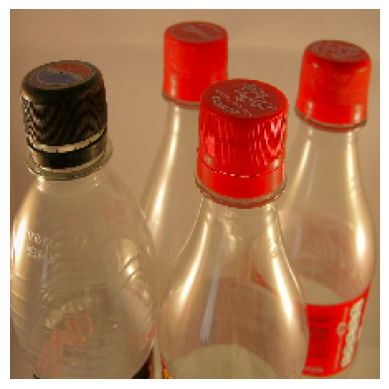

In [95]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 이미지 파일 경로 설정
image_path = '/content/drive/MyDrive/recycle/test_data1/pet bottle/pet bottle_000004.jpg'  # 이미지 파일의 경로를 설정합니다.

# 이미지를 불러오고 크기를 조정
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)

# 이미지를 모델의 입력에 맞게 전처리
img = img / 255.0  # 이미지의 픽셀 값을 [0, 1] 범위로 조정
img = np.expand_dims(img, axis=0)  # 배치 차원을 추가 (1개의 이미지)

# 이미지 시각화
plt.imshow(img[0])
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 84ms/step


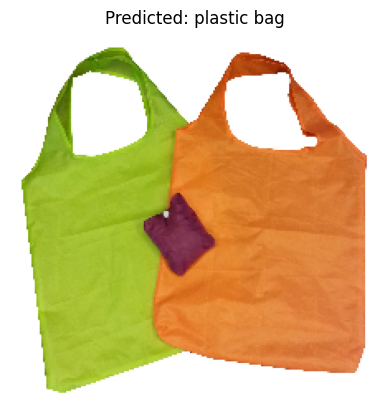

In [89]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 이미지 파일 경로 설정
image_path = '/content/drive/MyDrive/recycle/test_data1/plastic bag/plastic bag_000005.jpg'  # 이미지 파일의 경로를 설정합니다.

# 이미지를 불러오고 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 이미지 크기를 모델의 입력 크기로 조정
img = image.img_to_array(img)  # 이미지를 넘파이 배열로 변환
# 시각화를 위한 것
imgs = img / 255.0  # 이미지의 픽셀 값을 [0, 1] 범위로 조정
imgs = np.expand_dims(imgs, axis=0)  # 배치 차원을 추가 (1개의 이미지)

# 이미지를 모델에 전달하기 위한 전처리 (VGG16의 preprocess_input 함수 사용)
from tensorflow.keras.applications.vgg16 import preprocess_input
img = np.expand_dims(img, axis=0)  # 배치 차원을 추가 (1개의 이미지)
img = preprocess_input(img)

import matplotlib.pyplot as plt

# 모델에 이미지 입력하여 결과 출력
result = model.predict(img)

# 클래스 이름 정의 (모델의 클래스에 맞게 설정)
class_names = ['paper bag', 'pet bottle','plastic bag']

# 이미지 시각화
plt.imshow(imgs[0])  # 전처리 반대 작업 (VGG16 모델의 preprocess_input 역전처리)
plt.title(f'Predicted: {class_names[np.argmax(result)]}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 19ms/step


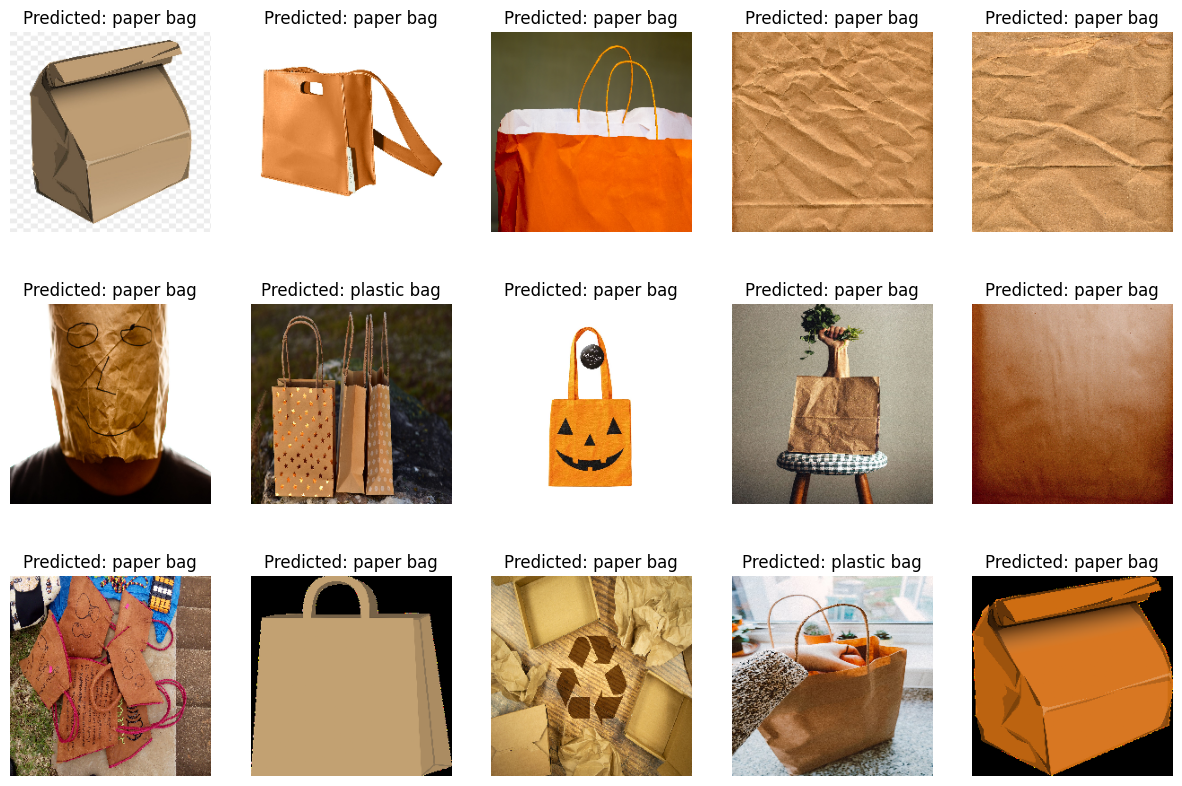

In [93]:
import os

# plastic bag 이미지 파일 경로 설정
plastic_bag_dir = '/content/drive/MyDrive/recycle/train_data1/paper bag'
class_names = ['paper bag', 'pet bottle','plastic bag']
plastic_bag_images = [os.path.join(plastic_bag_dir, img) for img in os.listdir(plastic_bag_dir)[:15]]

# 이미지를 시각화
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(plastic_bag_images):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    imgs = img / 255.0  # 이미지의 픽셀 값을 [0, 1] 범위로 조정
    imgs = np.expand_dims(imgs, axis=0)  # 배치 차원을 추가 (1개의 이미지)

    img = np.expand_dims(img, axis=0)  # 배치 차원을 추가 (1개의 이미지)
    img = preprocess_input(img)

    result = model.predict(img)



    plt.subplot(3, 5, i + 1)
    plt.imshow(imgs[0])
    plt.title(f'Predicted: {class_names[np.argmax(result)]}')
    plt.axis('off')

plt.show()

In [ ]:
for x in ['train_data1','valid_data1','test_data1']:
  add='/content/drive/MyDrive/recycle/'+x
  os.rmdir(add)